La valeur de la bande interdite vaut : 2.1383  [eV] et celle-ci est indirecte.
La valeur de la bande interdite directe vaut : 2.1845 [eV].
L'index de la première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
L'index de la dernière bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]})


En comptant les branches de gauche à droite à partir de 0, 

--bande de valence-- 

Branche avec la plus petite pente: 0 	 Valeur de cette pente: 0.02135595546524355
Branche avec la plus grande pente: 2 	 Valeur de cette pente: 0.1537887235631787 

--bande de conduction-- 

Branche avec la plus petite pente: 6 	 Valeur de cette pente: 0.06707411798779758
Branche avec la plus grande pente: 4 	 Valeur de cette pente: 2.670815528878476


Calcul de la masse effective au sommet de la dernière bande de valence et celle à la base de la bande de conduction en supposant une dispersion parabolique
La masse effective au sommet de la bande de valence: -3.758757686247561e-

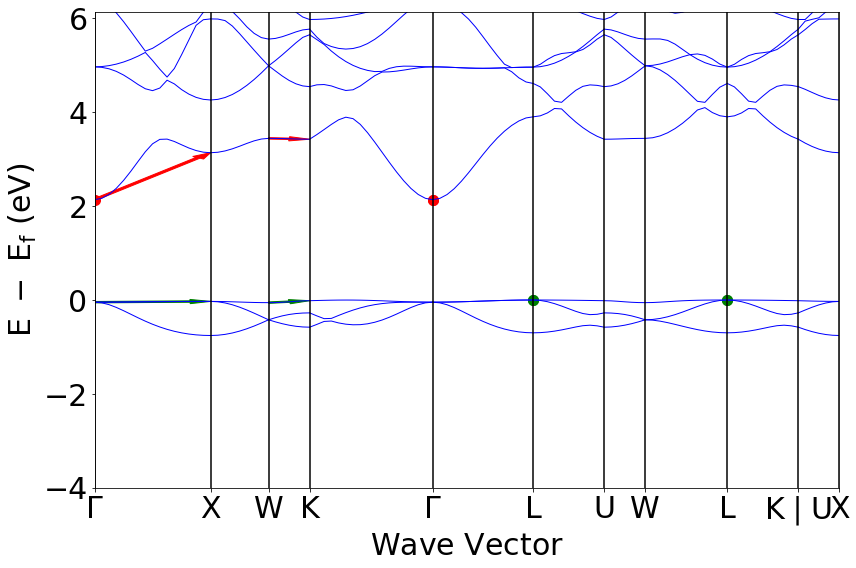

In [14]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
import pymatgen.symmetry.analyzer as an
import pymatgen.electronic_structure.bandstructure as bst
import pymatgen.electronic_structure.plotter as bplt
import matplotlib.pyplot as plt
from numpy import *

with MPRester("SbN3LIBvkZaEmT4M") as m:
    
    #struc = m.get_structure_by_material_id("mp-1747")
    #structure = an.SpacegroupAnalyzer(struc).get_primitive_standard_structure()
    
    bandstruc = m.get_bandstructure_by_material_id("mp-1747")
    bandgap = bandstruc.get_band_gap()
    directbandgap = bandstruc.get_direct_band_gap()
    print("La valeur de la bande interdite vaut :", bandgap['energy']," [eV] et celle-ci est indirecte.")
    print("La valeur de la bande interdite directe vaut :", directbandgap,"[eV].")
    
    cbm = bandstruc.get_cbm()
    vbm = bandstruc.get_vbm()
    print("L'index de la première bande de conduction :",cbm['band_index'])
    print("L'index de la dernière bande de valence :",vbm['band_index'])
    
    branchstruc1 = bandstruc.get_branch(12)
    branchstruc2 = bandstruc.get_branch(11)
    
    
    bandplotobj = bplt.BSPlotter(bandstruc)
    
    BranchEnergies =  bandplotobj.bs_plot_data()['energy']
    Branchk = bandplotobj.bs_plot_data()['distances']
    
    print("\n")
    
    ###############################distance entre chaque abscisse
    
    distance = zeros(len(Branchk))
    i=0
    while i < len(Branchk):
        distance[i]=Branchk[i][-1]-Branchk[i][0]
        i=i+1
    
    #############################gap d'énergie entre chaque point de la bande de valence
        
    energies_val_band = zeros(len(BranchEnergies))
    i=0
    while i < len(BranchEnergies):
        energies_val_band[i]=BranchEnergies[i]['1'][11][-1]-BranchEnergies[i]['1'][11][0]
        i=i+1
    
    #############################gap d'énergie entre chaque point de la bande de conduction
    
    energies_cond_band = zeros(len(BranchEnergies))
    i=0
    while i < len(BranchEnergies):
        energies_cond_band[i]=BranchEnergies[i]['1'][12][-1]-BranchEnergies[i]['1'][12][0]
        i=i+1
    #############################pentes
    i=0
    pente_val = zeros(len(energies_val_band))
    pente_cond = zeros(len(energies_cond_band))
    
    while i < len(pente_val):
        pente_val[i] = abs(energies_val_band[i]/distance[i])
        pente_cond[i] = abs(energies_cond_band[i]/distance[i])
        i = i+1
    print("En comptant les branches de gauche à droite à partir de 0, \n")
    print("--bande de valence-- \n")
    print("Branche avec la plus petite pente:",argmin(pente_val),"\t Valeur de cette pente:",min(pente_val))
    print("Branche avec la plus grande pente:",argmax(pente_val),"\t Valeur de cette pente:",max(pente_val),'\n')
    print("--bande de conduction-- \n")
    print("Branche avec la plus petite pente:",argmin(pente_cond),"\t Valeur de cette pente:",min(pente_cond))
    print("Branche avec la plus grande pente:",argmax(pente_cond),"\t Valeur de cette pente:",max(pente_cond))
    
    
    bandplotobj.get_plot(vbm_cbm_marker=True)
    plt.arrow(Branchk[argmin(pente_val)][0],BranchEnergies[argmin(pente_val)]['1'][11][0],Branchk[argmin(pente_val)][-1]-Branchk[argmin(pente_val)][0],BranchEnergies[argmin(pente_val)]['1'][11][-1]-BranchEnergies[argmin(pente_val)]['1'][11][0],width = 0.03,length_includes_head=True,color='green')
    plt.arrow(Branchk[argmax(pente_val)][0],BranchEnergies[argmax(pente_val)]['1'][11][0],Branchk[argmax(pente_val)][-1]-Branchk[argmax(pente_val)][0],BranchEnergies[argmax(pente_val)]['1'][11][-1]-BranchEnergies[argmax(pente_val)]['1'][11][0],width = 0.03,length_includes_head=True,color='green')
    plt.arrow(Branchk[argmin(pente_val)][0],BranchEnergies[argmin(pente_val)]['1'][12][0],Branchk[argmin(pente_val)][-1]-Branchk[argmin(pente_val)][0],BranchEnergies[argmin(pente_val)]['1'][12][-1]-BranchEnergies[argmin(pente_val)]['1'][12][0],width = 0.03,length_includes_head=True,color='red')
    plt.arrow(Branchk[argmax(pente_val)][0],BranchEnergies[argmax(pente_val)]['1'][12][0],Branchk[argmax(pente_val)][-1]-Branchk[argmax(pente_val)][0],BranchEnergies[argmax(pente_val)]['1'][12][-1]-BranchEnergies[argmax(pente_val)]['1'][12][0],width = 0.03,length_includes_head=True,color='red')
    
    ################################# calcul de la masse effective 
    print("\n")
    print("Calcul de la masse effective au sommet de la dernière bande de valence et celle à la base de la bande de conduction en supposant une dispersion parabolique")
    
    #bande de valence
    hbar=6.58212e-16
    kpoint_vbm_coord=vbm['kpoint'].cart_coords
    k=linalg.norm(kpoint_vbm_coord)
    E_k = vbm['energy']
    m_eff_v =  hbar**2 *k**2/(2*E_k)
    print('La masse effective au sommet de la bande de valence:', m_eff_v ,'[kg]')
    
    #bande de conduction 
    kpoint_cbm_coord=cbm['kpoint'].cart_coords
    k=linalg.norm(kpoint_cbm_coord)
    E_k = cbm['energy']
    m_eff_c =  hbar**2 *k**2/(2*E_k)
    print('La masse effective à la base de la bande de conduction:', m_eff_c ,'[kg]')